Objective for Data Analysis: I will be assuming the role of a data analyst in an ecommerce company that operates overall multiple regions with multiple products skews. The goal for this data analysis is to understand more about the sales performance of various products.

In [371]:
import pandas as pd
import seaborn as sns
import numpy as np

In [372]:
df = pd.read_csv(R"C:\Users\Ajkam\Downloads\sales_data (1).csv")

In [373]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [375]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


Note that an assumption was made that the Price column represented price per unit

In [376]:
column_dict = {'Product':'product_sku', 'Region':'region','Price':'price_per_unit', 
               'Units Sold':'units_sold','Sale Date':'sale_date' }
df= df.rename(columns=column_dict)
df

,product_sku,region,price_per_unit,units_sold,sale_date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [377]:
df.isna().sum()

product_sku       103
region            104
price_per_unit    105
units_sold        104
sale_date           0
dtype: int64

In [378]:
print(df.isna().any())


product_sku        True
region             True
price_per_unit     True
units_sold         True
sale_date         False
dtype: bool


In [379]:
print(df.isnull())

      product_sku  region  price_per_unit  units_sold  sale_date
0            True   False           False       False      False
1            True   False           False       False      False
2           False   False           False       False      False
3           False   False           False       False      False
4           False   False           False       False      False
...           ...     ...             ...         ...        ...
1045        False   False           False       False      False
1046        False   False            True       False      False
1047        False   False           False       False      False
1048         True   False            True       False      False
1049        False   False           False       False      False

[1050 rows x 5 columns]


<Axes: xlabel='units_sold', ylabel='Count'>

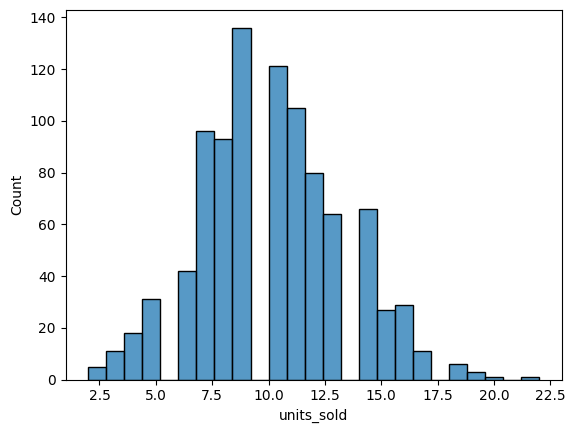

In [380]:
sns.histplot(df['units_sold'])

In [381]:
units_sold_mean = df['units_sold'].mean()

In [382]:
df['units_sold'].fillna(value=units_sold_mean, inplace= True)

<Axes: xlabel='units_sold', ylabel='Count'>

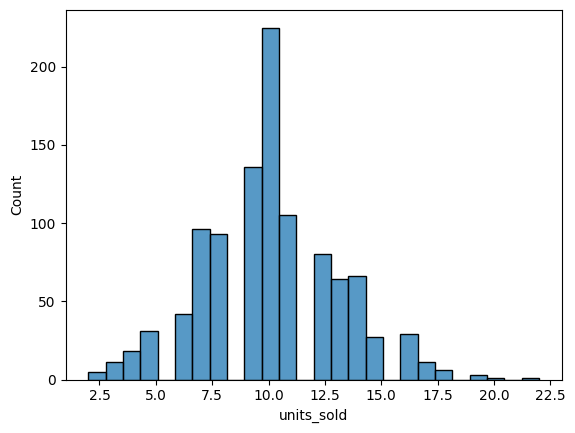

In [383]:
sns.histplot(df['units_sold'])

<Axes: xlabel='price_per_unit', ylabel='Count'>

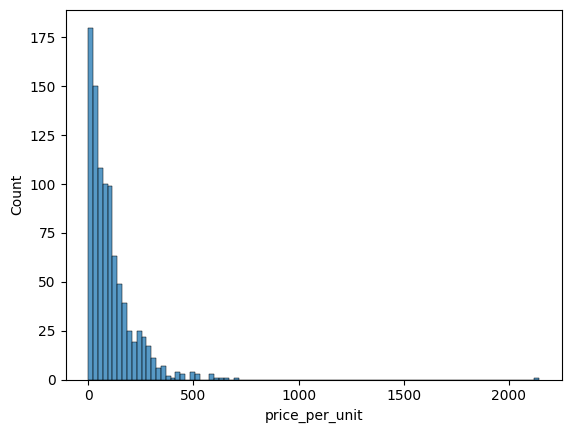

In [384]:
sns.histplot(df['price_per_unit'])

In [385]:
price_per_unit_median = df['price_per_unit'].median()

In [386]:
df['price_per_unit'].fillna(value=price_per_unit_median, inplace= True)

<Axes: xlabel='price_per_unit', ylabel='Count'>

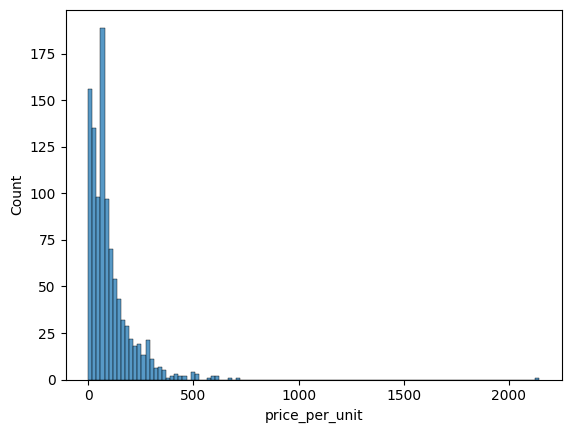

In [387]:
sns.histplot(df['price_per_unit'])

In [388]:
df.describe(include='all')

,product_sku,region,price_per_unit,units_sold,sale_date
count,947,946,1050.000000,1050.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,104.651819,10.048626,NaN
std,NaN,NaN,117.981782,3.010905,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,33.855000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,133.300000,12.000000,NaN


In [389]:
df.drop_duplicates(inplace=True)

In [390]:
print(df.isna().any())

product_sku        True
region             True
price_per_unit    False
units_sold        False
sale_date         False
dtype: bool


In [ ]:
df_storage = df['product_sku'].fillna("sku_undefined")
df_storage = df['region'].fillna("region_missing")



In [ ]:
print(df.isna().any())


In [ ]:
print(df_storage.isna().any())

In [ ]:
df.dropna

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

In [ ]:
print(df.isna().any())

In [ ]:
df.info()

In [ ]:
df.describe(include='all')

In [ ]:
sns.histplot(df['price_per_unit'])

In [ ]:
df[df['price_per_unit']>2000]

In [ ]:
df.drop(969, axis=0, inplace=True)

In [ ]:
sns.histplot(df['price_per_unit'])

In [ ]:
sns.histplot(df['units_sold'])

In [ ]:
df[df['units_sold']>20]

In [ ]:
df.drop(719, axis=0, inplace=True)

In [ ]:
sns.boxplot(data = df, x = 'price_per_unit')

In [ ]:
df[df['price_per_unit']>300]

In [ ]:
sns.boxplot(data = df, x = 'units_sold')

In [ ]:
df[df['units_sold']>18]

In [ ]:
df.drop(df[df['units_sold']>18].index, axis=0, inplace=True)


In [ ]:
sns.boxplot(data = df, x = 'units_sold')

In [ ]:
sns.scatterplot(data=df, x='units_sold',y='price_per_unit')

In [ ]:
sns.lmplot(data=df, x='units_sold',y='price_per_unit', fit_reg=True)

In [ ]:
df[df['price_per_unit']>450]

In [ ]:
df.drop(df[df['price_per_unit']>450].index, axis=0, inplace=True)

In [ ]:
df.describe(include='all')

In [ ]:
sns.boxplot(data = df, x = 'price_per_unit')

In [ ]:
sns.lmplot(data=df, x='units_sold',y='price_per_unit', fit_reg=True)

In [ ]:
df.drop(df[df['price_per_unit']>300].index, axis=0, inplace=True)

In [ ]:
sns.boxplot(data = df, x = 'price_per_unit')

In [ ]:
df.describe(include='all')